<a href="https://colab.research.google.com/github/ab39912/LGMVIP-Data-Science/blob/main/LGM_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Beginner Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM**

**Author- Ameya Bhalerao**

Importing required packages

In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

Import the data and remove rows containing NAN values

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df_close = df['Close']

In [5]:
df_close.shape

(2035,)

Plotting of df_close

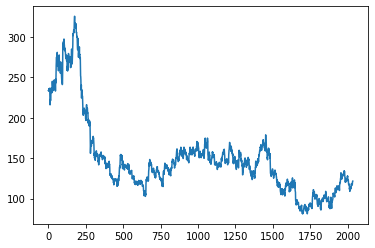

In [6]:
plt.plot(df_close)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [8]:
df_close.shape

(2035, 1)

In [9]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Splitting the data into train and test 

In [10]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [11]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

Reshaping the input to be [samples, time steps, features] which is the requirement of LSTM

In [13]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

Creating the LSTM Model

In [14]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

Summary of the model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Fitting of the model

In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 32s 596ms/step - loss: 0.0325 - val_loss: 0.0058
Epoch 2/100
23/23 [==============================] - 8s 342ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 3/100
23/23 [==============================] - 8s 338ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 8s 338ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/100
23/23 [==============================] - 8s 359ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 8s 338ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 8s 343ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 8s 341ms/step - loss: 0.0011 - val_loss: 9.9159e-04
Epoch 9/100
23/23 [==============================] - 8s 339ms/step - loss: 0.0012 - val_loss: 9.3628e-04
Epoch 10/100
23/23 [==============================] - 8s 340ms/step - loss: 0.0011

Predicting and checking performance metrics

In [16]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

Transforming back to the original form

In [17]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculation of RMSE performance metrics

In [18]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

79.70729568126913

Testing Data RMSE

In [19]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

80.61614362191281

Plotting

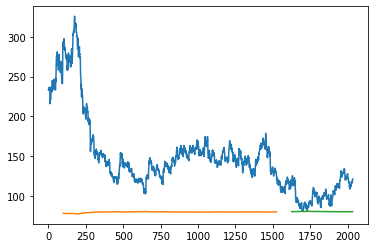

In [20]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction of Next 30 days Stock Price

In [21]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [22]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [23]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

Finding output 

In [24]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.01940359 0.02246732 0.03125    0.02348856 0.0249183  0.02144608
 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889
 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582
 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373 0.04575163
 0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961

In [25]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [26]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [27]:
len(df_close)

2035

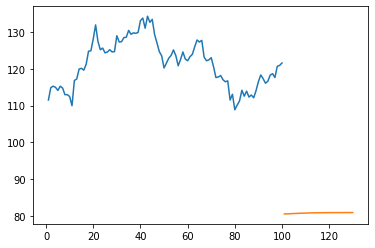

In [28]:
plt.plot(day_new, scaler.inverse_transform(df_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))